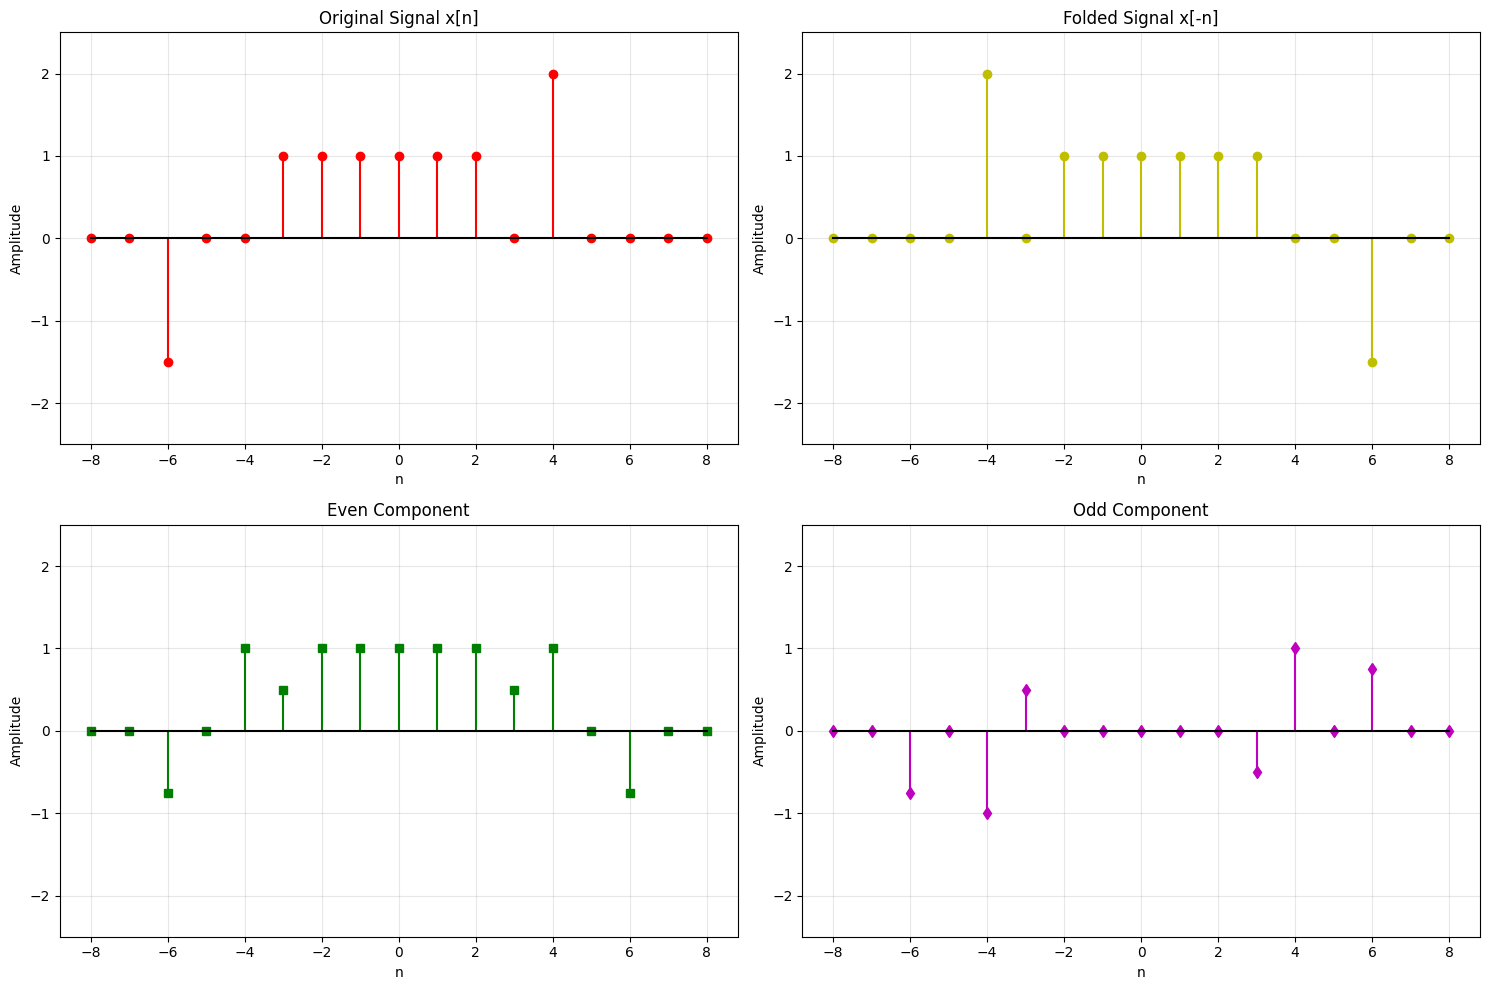

Max reconstruction error: 0.0
Even component symmetry check: True
Odd component symmetry check: True


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to fold the signal (x[-n])
def fold_signal(x):
    return x[::-1]

# Function to compute the even component
def even_component(x, x_folded):
    return (x + x_folded) / 2

# Function to compute the odd component
def odd_component(x, x_folded):
    return (x - x_folded) / 2

# Define the range of n (time indices)
n = np.arange(-8, 9)
x = np.zeros_like(n, dtype=float)

# Define an example signal
x[(n >= -3) & (n <= 2)] = 1.0
x[n == 4] = 2.0
x[n == -6] = -1.5

# Compute folded, even, and odd components
x_folded = fold_signal(x)
x_even = even_component(x, x_folded)
x_odd = odd_component(x, x_folded)

# Plot all signals
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

signals = [
    (x, "Original Signal x[n]", 'r-', 'ro'),
    (x_folded, "Folded Signal x[-n]", 'y-', 'yo'),
    (x_even, "Even Component", 'g-', 'gs'),
    (x_odd, "Odd Component", 'm-', 'md')
]

# Loop through each subplot and plot signals
for ax, (sig, title, line, marker) in zip(axs.flat, signals):
    ax.stem(n, sig, linefmt=line, markerfmt=marker, basefmt='k-')
    ax.set_title(title)
    ax.set_xlabel('n')
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-2.5, 2.5)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Verify reconstruction: x[n] should equal x_even[n] + x_odd[n]
print("Max reconstruction error:", np.max(np.abs(x - (x_even + x_odd))))
print(f"Even component symmetry check: {np.allclose(x_even, x_even[::-1])}")
print(f"Odd component symmetry check: {np.allclose(x_odd, -x_odd[::-1])}")
